In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [24]:
data = pd.read_csv('cleaned_naukri_com-job_sample.csv')


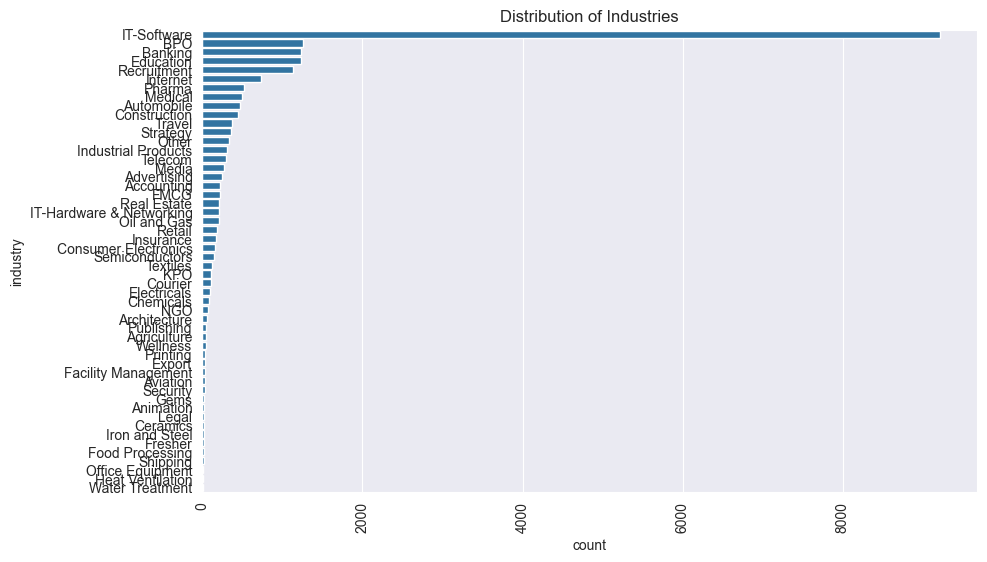

In [5]:
# Create a bar chart to visualize the distribution of industries
plt.figure(figsize=(10, 6))
sns.countplot(data['industry'], order=data['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Industries')
plt.show()

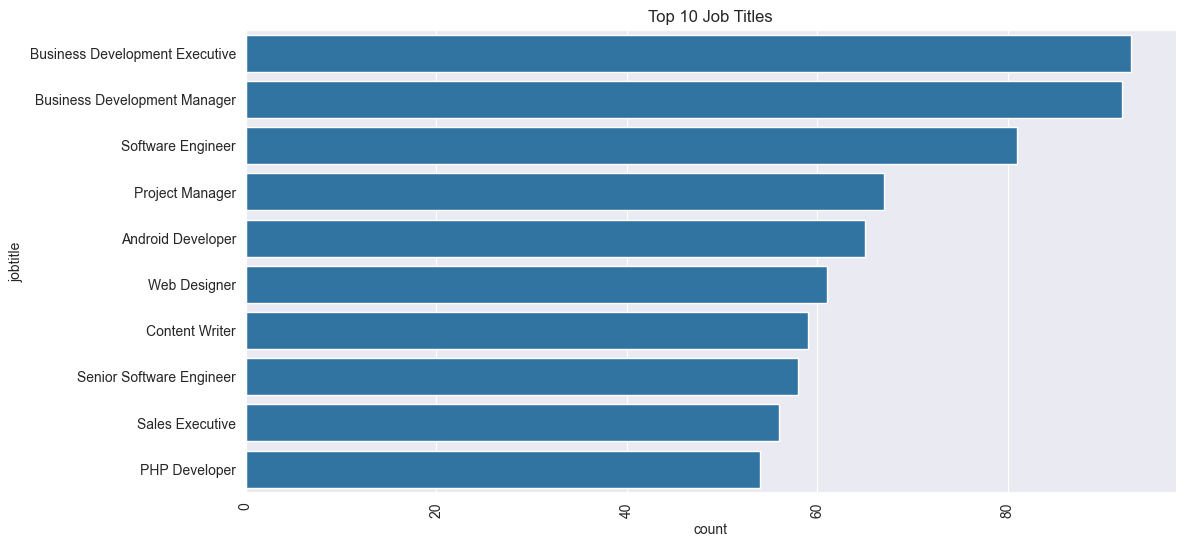

In [6]:
# Create a bar chart to visualize the distribution of job titles
plt.figure(figsize=(12, 6))
sns.countplot(data['jobtitle'], order=data['jobtitle'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles')
plt.show()

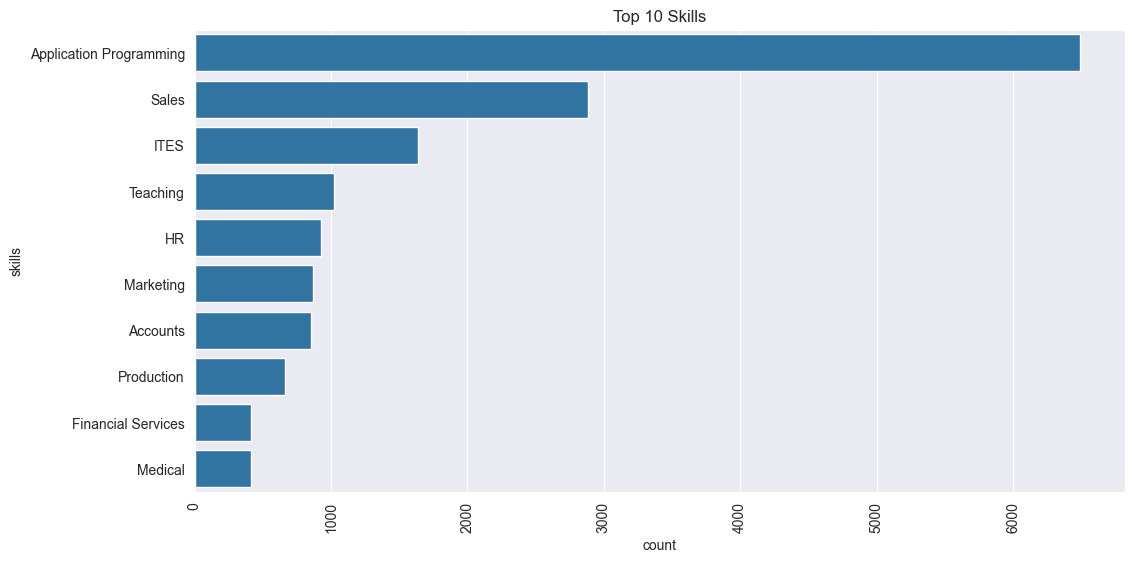

In [7]:
# Create a bar chart to visualize the distribution of skills
skills_df = data['skills'].str.split(',').explode().str.strip()
plt.figure(figsize=(12, 6))
sns.countplot(skills_df, order=skills_df.value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Skills')
plt.show()

In [21]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

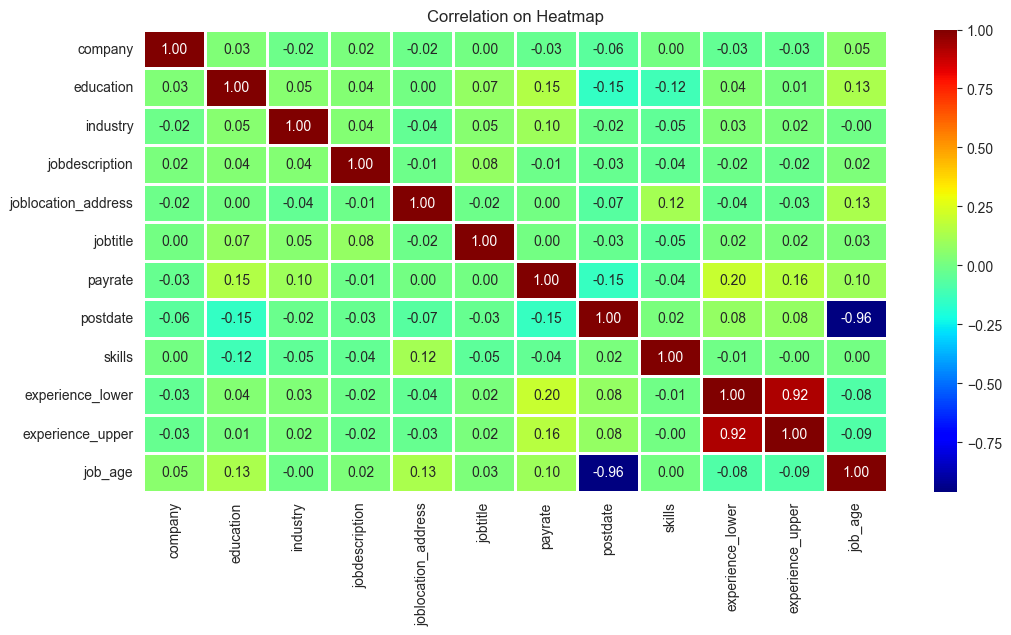

In [22]:
# visualization - heatmap and correlation
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='jet', fmt='.2f', linewidths=2, annot=True)
plt.title("Correlation on Heatmap")
plt.show()

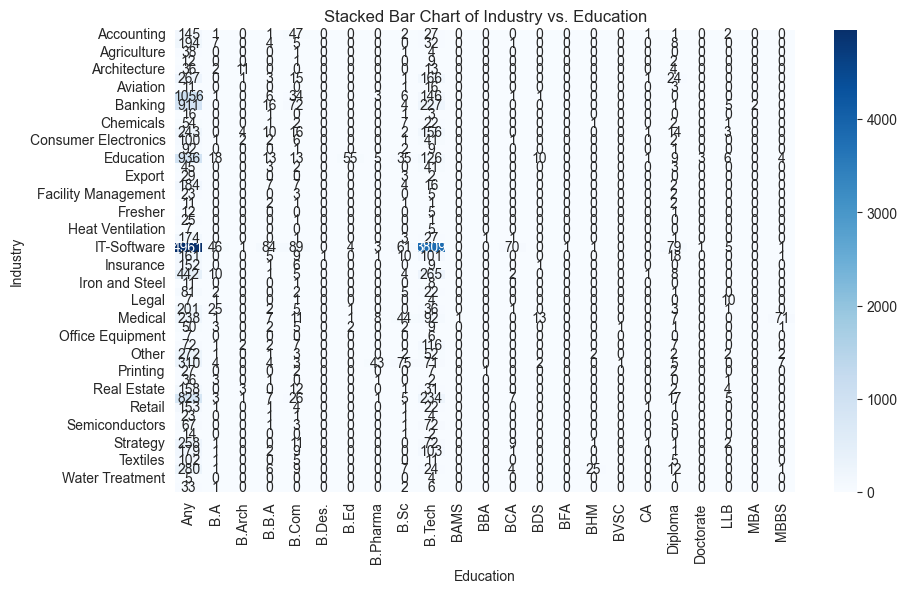

In [27]:
# Create a cross-tabulation table between 'industry' and 'education'
cross_tab = pd.crosstab(index=data['industry'], columns=data['education'])

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Education')
plt.ylabel('Industry')
plt.title('Stacked Bar Chart of Industry vs. Education')
plt.show()